# E Commerce AI project 

**Week 1 tasks - Data collaction and exploratory analysis**

In [1]:
# Importing libraries 
import os
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

import warnings 
warnings.filterwarnings("ignore")

In [2]:
#Loading datasets 
train = pd.read_csv("train_data.csv",parse_dates=["reviews.date"])
test = pd.read_csv("test_data.csv", parse_dates=["reviews.date"])
hidden = pd.read_csv("test_data_hidden.csv", parse_dates=["reviews.date"])

In [3]:
# Samples of datasets
train.head(1)

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2016-12-26 00:00:00+00:00,Purchased on Black FridayPros - Great Price (e...,Powerful tablet,Positive


In [4]:
test.head(1)

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title
0,"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Include...",Amazon,"Fire Tablets,Computers/Tablets & Networking,Ta...",Electronics,2016-05-23 00:00:00+00:00,Amazon kindle fire has a lot of free app and c...,very handy device


In [5]:
hidden.head(1)

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
0,"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Include...",Amazon,"Fire Tablets,Computers/Tablets & Networking,Ta...",Electronics,2016-05-23 00:00:00+00:00,Amazon kindle fire has a lot of free app and c...,very handy device,Positive


In [6]:
# Dimensions of datasets 
train.shape, test.shape, hidden.shape

((4000, 8), (1000, 7), (1000, 8))

Exploratory data analysis 

In [7]:
# Schema of dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   name               4000 non-null   object             
 1   brand              4000 non-null   object             
 2   categories         4000 non-null   object             
 3   primaryCategories  4000 non-null   object             
 4   reviews.date       4000 non-null   datetime64[ns, UTC]
 5   reviews.text       4000 non-null   object             
 6   reviews.title      3990 non-null   object             
 7   sentiment          4000 non-null   object             
dtypes: datetime64[ns, UTC](1), object(7)
memory usage: 250.1+ KB


In [8]:
# Checking for duplicates 
train.duplicated().sum()

58

Observation

> The train dataset has 58 duplicates

> Duplicates do not increase the predictive power of model since they do not bring any new information hence will be dropped 





In [9]:
# dropping duplicates in all datasets
for df in [train, hidden, test]:
  df.drop_duplicates(keep="first", inplace=True)

In [10]:
# Selecting columns necesary for sentiment analysis 
train = train[["reviews.text", "sentiment"]]
hidden = hidden[["reviews.text", "sentiment"]]

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3942 entries, 0 to 3999
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   reviews.text  3942 non-null   object
 1   sentiment     3942 non-null   object
dtypes: object(2)
memory usage: 92.4+ KB


In [12]:
train.isna().sum()

reviews.text    0
sentiment       0
dtype: int64

Observation

> There are no missing values in dataset


Text preprocessing 

In [13]:
# Converting reviews to lower case (Normalizing)
for df in [train, hidden, test]:
  df["reviews.text"]= df["reviews.text"].str.lower()

In [14]:
# Removing punctuations and special characters 
for df in [train, hidden, test]:
  df["reviews.text"]= df["reviews.text"].str.replace('[^\w\s]', " ")

In [15]:
# Removing digits 
for df in [train, hidden, test]:
  df["reviews.text"] = df["reviews.text"].replace('\d', " ", regex = True)

In [16]:
# Tokenizing reviews 
nltk.download("punkt")
for df in [train, hidden, test]:
  df["reviews.text"] = df["reviews.text"].apply(nltk.word_tokenize)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [17]:
# Removing stop words 
from nltk.corpus import stopwords 
nltk.download("stopwords")
stop = stopwords.words('english')
for df in [train, hidden, test]:
  df["reviews.text"]= df["reviews.text"].apply(lambda x: [word for word in x if word not in stop])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
# Lemmatization 
nltk.download('wordnet')
def lemmatize_text(text):
  lemmatizer = WordNetLemmatizer()
  return [lemmatizer.lemmatize(w, 'v') for w in (text)]

for df in [train, hidden, test]:
  df["reviews.text"] = df["reviews.text"].apply (lemmatize_text)


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [19]:
# Converting the lemmatized list to string 
for df in [train, test, hidden]:
  df["reviews.text"] = df["reviews.text"].str.join(" ")

In [20]:
#saving the cleaned dataset 
train.to_csv("train.csv")

Analysis of words in reviews

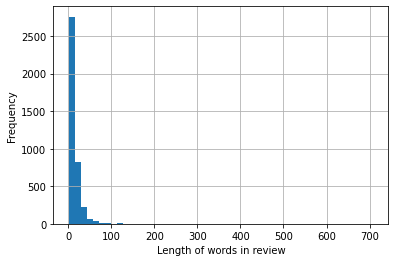

In [21]:
words_per_review = train["reviews.text"].apply(lambda x : len(x.split()))
words_per_review.hist(bins=50)
plt.xlabel('Length of words in review')
plt.ylabel("Frequency")
plt.show()

In [22]:
words_per_review.mean()

15.150684931506849

Notes

> Each preprocessed review has an average of 15 words, and most the the reviews have less than 50 words



Visualizing the frequency of words according to sentiments

In [23]:
positive_sentiments = train[train["sentiment"]=="Positive"]
negative_sentiments = train[train["sentiment"]=="Negative"]
neutral_sentiments= train[train["sentiment"]=="Neutral"]

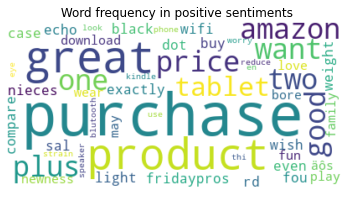

In [24]:
#Most frequent words in positive reviews
word_cloud_text = positive_sentiments["reviews.text"]
wordcloud = WordCloud(max_words=50, 
                      background_color="white", 
                      relative_scaling = 1, 
                      ).generate(str(word_cloud_text))
plt.figure()
plt.imshow(wordcloud, interpolation= "bilinear")
plt.title(" Word frequency in positive sentiments")
plt.axis("off")
plt.show()

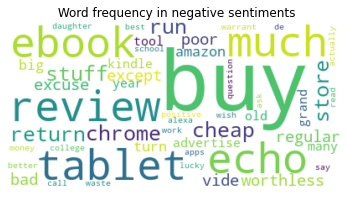

In [25]:
#Most frequent words in negative reviews
word_cloud_text = negative_sentiments["reviews.text"]
wordcloud = WordCloud(max_words=50, 
                      background_color="white", 
                      relative_scaling = 1, 
                      ).generate(str(word_cloud_text))
plt.figure()
plt.imshow(wordcloud, interpolation= "bilinear")
plt.title(" Word frequency in negative sentiments")
plt.axis("off")
plt.show()

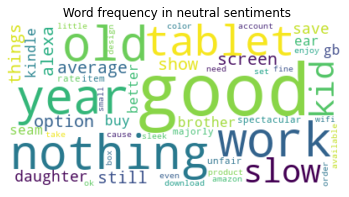

In [26]:
#Most frequent words in neutral  reviews
word_cloud_text = neutral_sentiments["reviews.text"]
wordcloud = WordCloud(max_words=50, 
                      background_color="white", 
                      relative_scaling = 1, 
                      ).generate(str(word_cloud_text))
plt.figure()
plt.imshow(wordcloud, interpolation= "bilinear")
plt.title(" Word frequency in neutral sentiments")
plt.axis("off")
plt.show()

Positive    3694
Neutral      158
Negative      90
Name: sentiment, dtype: int64

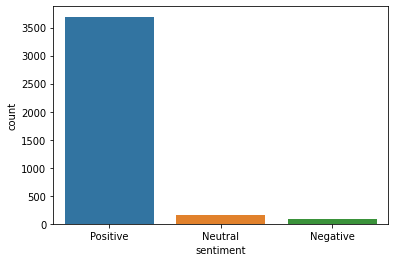

In [27]:
#Checking the class count of target column to see if dataset is balanced 
sns.countplot(train["sentiment"])
train['sentiment'].value_counts()

Notes:

> The target feature is imbalanced hence there is need to balance the datasets so that models can perform well

